# Import Libraries

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix

# Load Dataset

In [54]:
df = pd.read_csv('D:\Reasearch_Topic\Dataset/AirQuality.csv', sep=';')
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Understanding

In [55]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [56]:
df.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,NaN,NaN
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,NaN,NaN
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,NaN,NaN
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,NaN,NaN
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,NaN,NaN


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [58]:
df.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [59]:
df.nunique()

Date              391
Time               24
CO(GT)            104
PT08.S1(CO)      1042
NMHC(GT)          430
C6H6(GT)          408
PT08.S2(NMHC)    1246
NOx(GT)           926
PT08.S3(NOx)     1222
NO2(GT)           284
PT08.S4(NO2)     1604
PT08.S5(O3)      1744
T                 437
RH                754
AH               6684
Unnamed: 15         0
Unnamed: 16         0
dtype: int64

In [60]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

# Exploratory Data Analyis

In [61]:
df['Unnamed: 15'].isnull()

0       True
1       True
2       True
3       True
4       True
        ... 
9466    True
9467    True
9468    True
9469    True
9470    True
Name: Unnamed: 15, Length: 9471, dtype: bool

In [62]:
df['Unnamed: 16'].isnull()

0       True
1       True
2       True
3       True
4       True
        ... 
9466    True
9467    True
9468    True
9469    True
9470    True
Name: Unnamed: 16, Length: 9471, dtype: bool

In [63]:
df.drop(['Unnamed: 15', 'Unnamed: 16', 'Date', 'Time'], axis=1, inplace = True)

# Check Null value

In [64]:
nullvalues = df.isnull().sum().sort_values(ascending = False)
nullvalues = df.isnull().sum()

nullvalues

CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

# Check Null Value and Percentage of missing values

In [65]:
null_value_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
null_value_percentage

CO(GT)           1.203674
PT08.S1(CO)      1.203674
NMHC(GT)         1.203674
C6H6(GT)         1.203674
PT08.S2(NMHC)    1.203674
NOx(GT)          1.203674
PT08.S3(NOx)     1.203674
NO2(GT)          1.203674
PT08.S4(NO2)     1.203674
PT08.S5(O3)      1.203674
T                1.203674
RH               1.203674
AH               1.203674
dtype: float64

# Concat Total Missing
# And match with Percentage

In [66]:
missing_data_with_percenage = pd.concat([nullvalues,null_value_percentage], axis =1, keys =['Total', 'Percentage'])
missing_data_with_percenage

,Total,Percentage
CO(GT),114,1.203674
PT08.S1(CO),114,1.203674
NMHC(GT),114,1.203674
C6H6(GT),114,1.203674
PT08.S2(NMHC),114,1.203674
NOx(GT),114,1.203674
PT08.S3(NOx),114,1.203674
NO2(GT),114,1.203674
PT08.S4(NO2),114,1.203674
PT08.S5(O3),114,1.203674


In [67]:
df.fillna(0, inplace =True)

# Formatting some object columns from strings to floats

In [68]:
df.replace(to_replace=',',value='.',regex=True,inplace=True) 

for i in 'C6H6(GT) T RH AH'.split():
    df[i] = pd.to_numeric(df[i],errors='coerce') 

In [69]:
df

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
9467,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
9468,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
9469,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000


In [70]:
df.describe()

,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000
mean,1036.363636,-157.175166,1.843227,883.827262,166.587372,785.421075,57.448949,1374.730757,963.335339,9.660606,39.010105,-6.755301
std,347.227526,140.024164,41.130888,353.976503,256.539570,331.584542,126.333345,488.554210,466.461811,42.956031,51.088738,38.748535
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,915.000000,-200.000000,3.900000,704.000000,47.000000,631.000000,51.000000,1171.000000,689.000000,10.700000,33.500000,0.676800
50%,1050.000000,-200.000000,7.800000,890.000000,139.000000,791.000000,95.000000,1440.000000,936.000000,17.000000,48.100000,0.971100
75%,1218.000000,-200.000000,13.500000,1102.000000,281.500000,957.000000,132.000000,1658.000000,1250.000000,24.000000,61.700000,1.291500
max,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


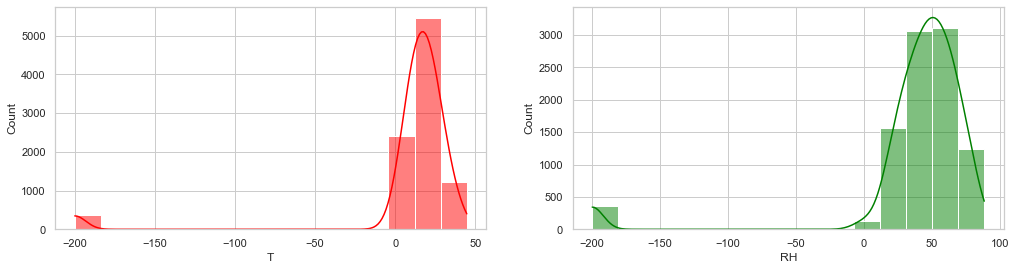

In [71]:
plt.figure(figsize=(17,9))
plt.subplot(2,2,1)
sns.histplot(df["T"],stat="count",color="red",bins=15,kde={'alpha':0.5})
plt.subplot(2,2,2)
sns.histplot(df.RH,stat="count",color = "green",bins=15,kde={'alpha':0.5})
plt.show()

<AxesSubplot:xlabel='AH', ylabel='Count'>

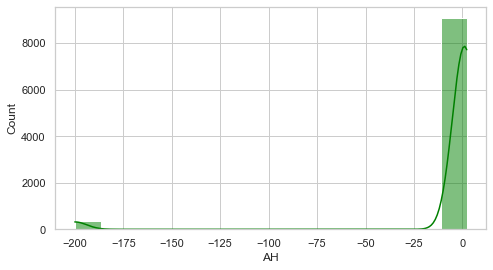

In [72]:
plt.figure(figsize=(17,9))
plt.subplot(2,2,1)
sns.histplot(df.AH,stat="count",color="green",bins=15,kde={'alpha':0.5})

In [73]:
#Checking the Statistics for all the AQ
print("Average Ratio of (sensor)Tin oxide(nominally CO targeted) : {0: .2f}".format(df['PT08.S1(CO)'].mean()))
print("Average Ratio of Benzene in microg/m^3 : {0: .2f}".format(df['C6H6(GT)'].mean()))
print("Average Ratio of (sensor)Non-Methane Hydrocarbons : {0: .2f}".format(df['PT08.S2(NMHC)'].mean()))
print("Average Ratio of Nitrogen Oxides in ppb : {0: .2f}".format(df['NOx(GT)'].mean()))
print("Average Ratio of (sensor)Tungsten oxide(nominally NOx targeted) : {0: .2f}".format(df['PT08.S3(NOx)'].mean()))
print("Average Ratio of true hourly averaged NO2(Nitrogen dioxide) : {0: .2f}".format(df['NO2(GT)'].mean()))
print("Average Ratio of (sensor)tungsten oxide(nominally NO2 targeted) : {0: .2f}".format(df['PT08.S4(NO2)'].mean()))
print("Average Ratio of (sensor)indium oxide(nominally O3 targeted) : {0: .2f}".format(df['PT08.S5(O3)'].mean()))
print("Average temperature in Celsius: {0: .2f}".format(df['T'].mean()))
print("Average Relative Humidity in % : {0: .2f}".format(df['AH'].mean()))
print("Average Absolute Humidity : {0: .2f}".format(df['RH'].mean()))

Average Ratio of (sensor)Tin oxide(nominally CO targeted) :  1036.36
Average Ratio of Benzene in microg/m^3 :  1.84
Average Ratio of (sensor)Non-Methane Hydrocarbons :  883.83
Average Ratio of Nitrogen Oxides in ppb :  166.59
Average Ratio of (sensor)Tungsten oxide(nominally NOx targeted) :  785.42
Average Ratio of true hourly averaged NO2(Nitrogen dioxide) :  57.45
Average Ratio of (sensor)tungsten oxide(nominally NO2 targeted) :  1374.73
Average Ratio of (sensor)indium oxide(nominally O3 targeted) :  963.34
Average temperature in Celsius:  9.66
Average Relative Humidity in % : -6.76
Average Absolute Humidity :  39.01


# plot graph for all columns

In [74]:
sns.set_theme(style="whitegrid")

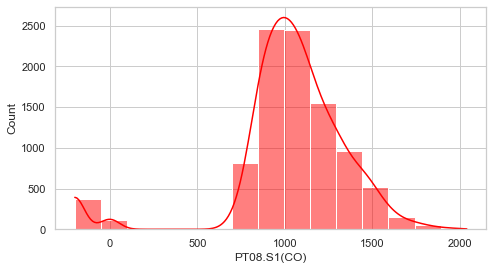

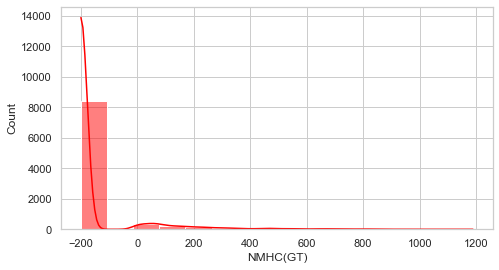

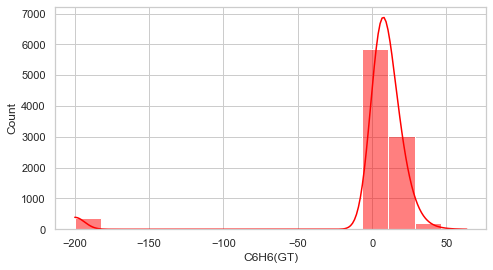

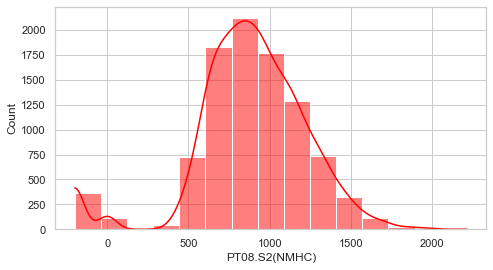

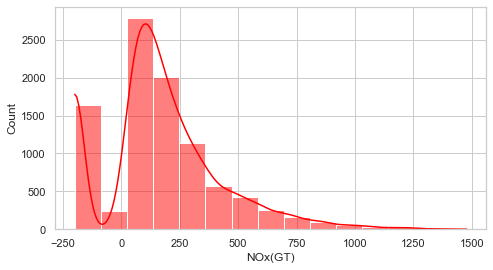

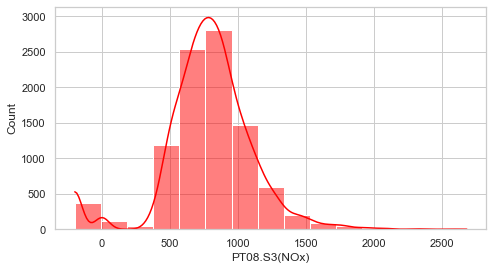

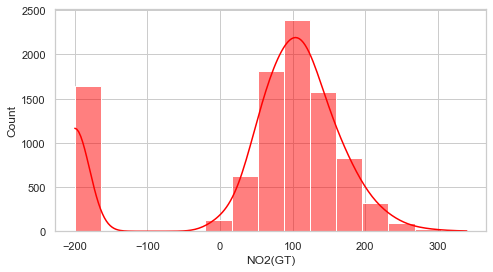

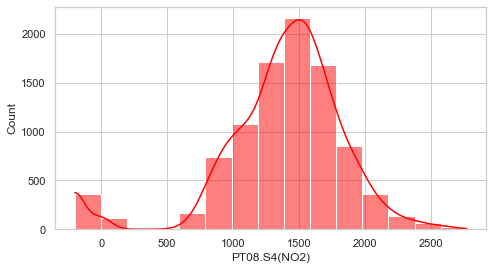

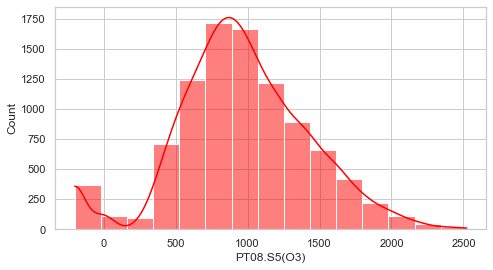

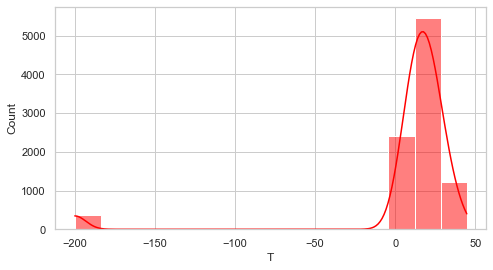

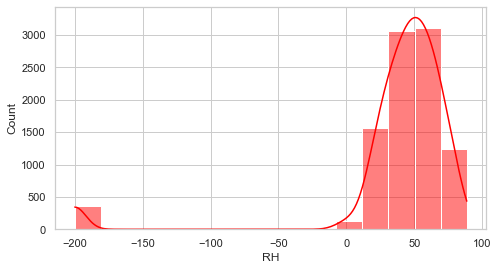

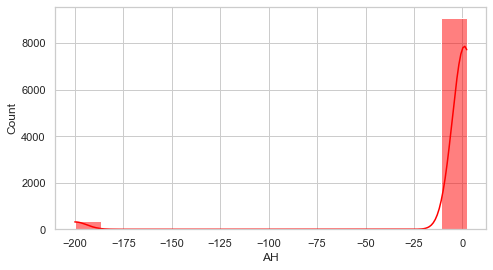

In [75]:
for i in df.columns[1:13]:
    plt.figure(figsize=(17,9))
    plt.subplot(2,2,1)
    sns.histplot(x=df[i],stat="count",color="red",bins=15,kde={'alpha':0.5})

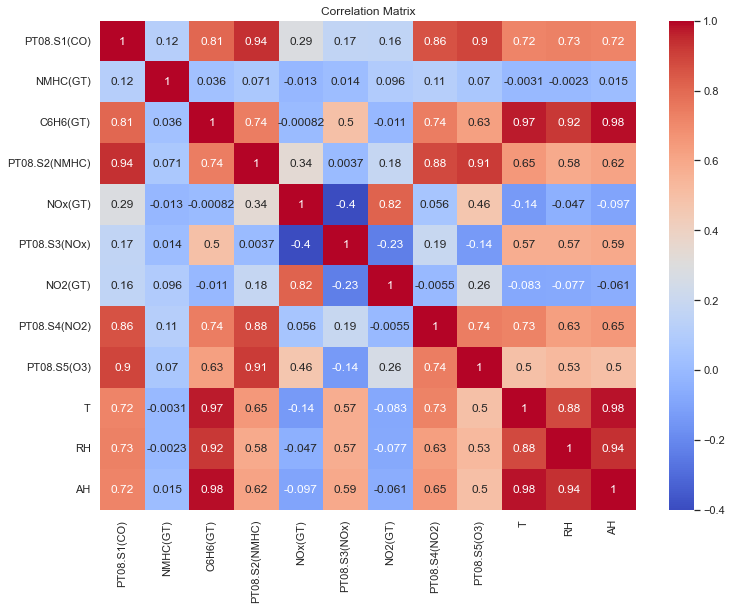

In [76]:
#Plotting correlation matrix
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True,cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [77]:
df.rename(columns={'PT08.S1(CO)': 'CO','PT08.S4(NO2)':'NO2', 'PT08.S5(O3)':'O3'},inplace=True)
print(df.columns)

Index(['CO(GT)', 'CO', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'NO2', 'O3', 'T', 'RH', 'AH'],
      dtype='object')


In [78]:
df

,CO(GT),CO,NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),NO2,O3,T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
9467,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
9468,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
9469,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000


# Calulate air quality index for NO2 based on formula

In [79]:
def cal_NO2(NO2):
    no2i = 0
    if(NO2<=40):
        no2i = NO2 * 50/40
    elif(NO2 > 40 and NO2 <= 80):
        no2i = 50 + (NO2-40)*(50/50)
    elif(NO2 > 80 and NO2 <= 180):
        no2i = 100 + (NO2 - 80)*(100/100)
    elif(NO2 > 180 and NO2 <= 280):
        no2i = 200 + (NO2 - 180)*(100/100)
    elif(NO2 > 280 and NO2 <=400):
        no2i = 300 + (NO2 -280)*(100/120)
    else:
        no2i = 400 + (NO2 - 400)*(100/120)
        return no2i
    
df['NO2i'] = df['NO2'].apply(cal_NO2)
data = df[['NO2', 'NO2i']]
print(data.head())

      NO2         NO2i
0  1692.0  1476.666667
1  1559.0  1365.833333
2  1555.0  1362.500000
3  1584.0  1386.666667
4  1490.0  1308.333333


 # Calulate air quality index for CO based on formula¶

In [80]:
def cal_CO(CO):
    coi = 0
    if CO <=1:
        coi = CO * 50 /1
        
    elif(CO<=40):
        coi = CO * 50/40
        
    elif(CO > 1 and CO <= 2):
        coi = 50 + (CO -1) * 50/1
        
    elif(CO > 2 and CO <= 10):
        coi = 100 + (CO - 2) * 100/8
        
    elif(CO > 10 and CO <= 17):
        coi = 200 + (CO - 10) * 100/7
        
    elif(CO > 17 and CO <= 34):
        coi = 300 + (CO - 17) * 100/17
        
    else:
        coi = 400 + (CO -34) * 100 /17
        return coi
        
df['COi'] = df['CO'].apply(cal_CO)
data = df[['CO', 'COi']]
print(data.head())

       CO          COi
0  1360.0  8200.000000
1  1292.0  7800.000000
2  1402.0  8447.058824
3  1376.0  8294.117647
4  1272.0  7682.352941


# Calulate air quality index for O3 based on formula¶

In [81]:
def Cal_O3(O3):
    o3i = 0
    if O3 <= 50:
        o3i = O3 * 50 / 50
        
    elif(O3 > 50 and O3 <= 100):
        o3i = 50 + (O3 - 50) * 50/50
        
    elif(O3 > 100 and O3 <= 168):
        o3i = 100 + (O3-100) * 100/68
        
    elif(O3 > 168 and O3 <= 208):
        o3i = 200 + (O3 - 168) * 100/40
    elif(O3 > 208 and O3 <=748):
        
        o3i = 300 + (O3 - 208) * 100/539
        
    else:
        o3i = 400 + (O3 - 400) * 100/539
        return o3i
    
df['O3i'] = df['O3'].apply(cal_NO2)
data = df[['O3', 'O3i']]
print(data.head())

       O3          O3i
0  1268.0  1123.333333
1   972.0   876.666667
2  1074.0   961.666667
3  1203.0  1069.166667
4  1110.0   991.666667


# Calculate the air quality index of every data value
# We will find the maximum value of each data value

In [82]:
def cal_aqi(no2i, coi, o3i):
    aqi = 0
    
    if(coi > coi and no2i > o3i):
        aqi = no2i
        
    if(coi > no2i and coi > o3i):
        aqi = coi
        
    if(o3i > no2i and o3i > coi):
        aqi = o3i
    return aqi
df['AQI'] = df.apply(lambda x:cal_aqi(x['NO2i'], x['COi'], x['O3i']), axis =1)
data = df[['NO2i', 'COi', 'O3i', 'AQI']]
data.head()

,NO2i,COi,O3i,AQI
0,1476.666667,8200.000000,1123.333333,8200.000000
1,1365.833333,7800.000000,876.666667,7800.000000
2,1362.500000,8447.058824,961.666667,8447.058824
3,1386.666667,8294.117647,1069.166667,8294.117647
4,1308.333333,7682.352941,991.666667,7682.352941


In [83]:
data.describe()

,NO2i,COi,O3i,AQI
count,8991.000000,8991.000000,8751.000000,9471.000000
mean,1280.220498,6669.606862,934.508913,6208.380381
std,288.505661,1276.941396,323.038248,2151.938766
min,525.833333,4005.882353,400.833333,0.000000
25%,1089.166667,5711.764706,692.500000,5582.352941
50%,1285.833333,6452.941176,879.166667,6376.470588
75%,1461.666667,7441.176471,1137.500000,7364.705882
max,2379.166667,12200.000000,2169.166667,12200.000000


# 1 = "Good", 2 = "Moderate", 3 = "Poor", 4 ="Unhealthy", 5 ="Very Unhealthy" 6 = "Hazadous"


In [84]:
def AQI_Range(ran):
    if ran <=50:
        return 1
    elif ran > 50 and ran <= 100:
        return 2
    elif ran > 100 and ran <= 200:
        return 3
    elif ran > 200 and ran <= 300:
        return 4
    elif ran > 300 and ran <= 400:
        return 5
    elif ran >400:
        return 6
df['AQI_Range'] = df['AQI'].apply(AQI_Range)
df.head()

,CO(GT),CO,NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),NO2,O3,T,RH,AH,NO2i,COi,O3i,AQI,AQI_Range
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,1476.666667,8200.000000,1123.333333,8200.000000,6
1,2,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,1365.833333,7800.000000,876.666667,7800.000000,6
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,1362.500000,8447.058824,961.666667,8447.058824,6
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,1386.666667,8294.117647,1069.166667,8294.117647,6
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,1308.333333,7682.352941,991.666667,7682.352941,6


In [85]:
df.head()

,CO(GT),CO,NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),NO2,O3,T,RH,AH,NO2i,COi,O3i,AQI,AQI_Range
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,1476.666667,8200.000000,1123.333333,8200.000000,6
1,2,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,1365.833333,7800.000000,876.666667,7800.000000,6
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,1362.500000,8447.058824,961.666667,8447.058824,6
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,1386.666667,8294.117647,1069.166667,8294.117647,6
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,1308.333333,7682.352941,991.666667,7682.352941,6


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9471 non-null   object 
 1   CO             9471 non-null   float64
 2   NMHC(GT)       9471 non-null   float64
 3   C6H6(GT)       9471 non-null   float64
 4   PT08.S2(NMHC)  9471 non-null   float64
 5   NOx(GT)        9471 non-null   float64
 6   PT08.S3(NOx)   9471 non-null   float64
 7   NO2(GT)        9471 non-null   float64
 8   NO2            9471 non-null   float64
 9   O3             9471 non-null   float64
 10  T              9471 non-null   float64
 11  RH             9471 non-null   float64
 12  AH             9471 non-null   float64
 13  NO2i           8991 non-null   float64
 14  COi            8991 non-null   float64
 15  O3i            8751 non-null   float64
 16  AQI            9471 non-null   float64
 17  AQI_Range      9471 non-null   int64  
dtypes: float

In [87]:
df['AQI_Range'].value_counts()

6    8751
1     720
Name: AQI_Range, dtype: int64

# spiting the dataset to training and testing

In [88]:
df1 = df[['NO2i', 'COi', 'O3i', 'AQI']]

In [89]:
df1.fillna(0, inplace = True)

C:\Users\Ma\AppData\Local\Temp\ipykernel_5504\3262177853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.fillna(0, inplace = True)


In [91]:
X = df1[['NO2i', 'COi', 'O3i']]
Y = df1['AQI']

In [92]:
X.head()

,NO2i,COi,O3i
0,1476.666667,8200.000000,1123.333333
1,1365.833333,7800.000000,876.666667
2,1362.500000,8447.058824,961.666667
3,1386.666667,8294.117647,1069.166667
4,1308.333333,7682.352941,991.666667


In [93]:
Y.head()

0    8200.000000
1    7800.000000
2    8447.058824
3    8294.117647
4    7682.352941
Name: AQI, dtype: float64

In [94]:
X.isnull().sum()

NO2i    0
COi     0
O3i     0
dtype: int64

In [95]:
Y.isnull().sum()

0

In [96]:
df1.isnull().sum()

NO2i    0
COi     0
O3i     0
AQI     0
dtype: int64

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2, random_state =70)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(7576, 3) (1895, 3) (7576,) (1895,)


# LinearRegression

In [102]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

# Predicting train and Test

In [103]:
print(model.intercept_, model.coef_, model.score(X, Y))

119.75965123947663 [0.56585954 0.5666217  2.10138164] 0.9107260090953325


In [104]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [121]:
RMSE_train = (np.sqrt(metrics.mean_squared_error(Y_train,train_predict)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(Y_test,test_predict)))

print("SMSE TraningData = ", str(RMSE_train))
print("SMSE TestingData = ", str(RMSE_test))
print('-'*40)
print("RSquared value on train", model.score(X_train, Y_train))
print("RSquared value on test", model.score(X_test, Y_test))

SMSE TraningData =  639.2516625195829
SMSE TestingData =  657.471718025261
----------------------------------------
RSquared value on train 0.9130279704243968
RSquared value on test 0.9008023452888381


# Decision Tree

In [ ]:
DT = DecisionTreeRegressor()
DT.fit(X_train, Y_train)

# Predict Train

In [ ]:
train_predict = DT.predict(X_train)

# Predict Test

In [ ]:
test_predict = DT.predict(X_test)

In [ ]:
RMSE_train = (np.sqrt(metrics.mean_squared_error(Y_train,train_predict)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(Y_test,test_predict)))

print("SMSE TraningData = ", str(RMSE_train))
print("SMSE TraningData = ", str(RMSE_test))
print('-'*40)
print("RSquared value on train", DT.score(X_train, Y_train))
print("RSquared value on test", DT.score(X_test, Y_test))

# Random Forest

In [ ]:
RF = RandomForestRegressor()
RF.fit(X_train, Y_train)

# Predict Train

In [ ]:
RF_train_predict = RF.predict(X_train)

# Predict Test

In [ ]:
RF_test_predict = RF.predict(X_test)

In [ ]:
RMSE_train = (np.sqrt(metrics.mean_squared_error(Y_train,train_predict)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(Y_test,test_predict)))

print("SMSE TraningData = ", str(RMSE_train))
print("SMSE TraningData = ", str(RMSE_test))
print('-'*40)
print("RSquared value on train", RF.score(X_train, Y_train))
print("RSquared value on test", RF.score(X_test, Y_test))

# Classification ALgorithms

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df2 = df[['NO2i', 'COi', 'O3i', 'AQI_Range']]

In [ ]:
df2['AQI_Range'].value_counts()

In [ ]:
df2.isnull().sum()

In [ ]:
df2.fillna(0, inplace =True)

In [ ]:
X2 = df2[['NO2i', 'COi', 'O3i']]
Y2 = df2['AQI_Range']

In [ ]:
#  X2.dropna(axis = 1, inplace =True)

In [ ]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2,test_size = 0.2, random_state =70)


# Logistic Regression

In [ ]:
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(X_train2, Y_train2)

# train predict

In [ ]:
train_predict2 = log_reg.predict(X_train2)

# test predict

In [ ]:
test_predict2=log_reg.predict(X_test2)

In [ ]:
# print accuracy on train
print("Model Accuracy of Train is", accuracy_score(Y_train2, train_predict2))
print('-'*50)
# print accuracy on test
print("Model Accuracy of Test is", accuracy_score(Y_test2, test_predict2))


In [ ]:
log_reg.predict([[270, 3, 1]])

# Decision Tree Classifier

In [ ]:
DT2 = DecisionTreeClassifier()

In [ ]:
DT2.fit(X_train2, Y_train2)

# predict on train

In [ ]:
train_predict3 = DT2.predict(X_train2)

# predict on test

In [ ]:
test_predict3 = DT2.predict(X_test2)

# Accuracy on train

In [ ]:
print("Model Accuracy on Train is:", accuracy_score(Y_train2, train_predict3))
print('-'*50)
print("Model Accuracy on Test is:", accuracy_score(Y_test2, test_predict3))

# Random Forest Classifier

In [ ]:
RF = RandomForestClassifier().fit(X_train2, Y_train2)

In [ ]:
# predict on train
train_predict4 = RF.predict(X_train2)
print("Model accuracy of train is:", accuracy_score(Y_train2, train_predict4))
print('-'*50)
# predict on test
test_predict4 = RF.predict(X_test2)
print("Model Accuracy of test is:", accuracy_score(Y_test2, test_predict4))


In [ ]:
RF.predict([[2000, 2990,20000]])

# K-Nearest Neighbours

In [ ]:
KNN = KNeighborsClassifier().fit(X_train2, Y_train2)


In [ ]:
# predict on train
train_predict5 = KNN.predict(X_train2)
print("Model accuracy of train is:", accuracy_score(Y_train2, train_predict5))
print('-'*50)
# predict on test
test_predict5 = KNN.predict(X_test2)
print("Model Accuracy of test is:", accuracy_score(Y_test2, test_predict5))

In [ ]:
RF.predict([[2000, 2000,1000]])